## 1. Data Preprocessing

In [1]:
import pandas as pd
import pickle

In [8]:
with open("covid.txt", "rb") as handle : # read text file into dataframe
  covid_df = pickle.loads(handle.read())
with open("christmas.txt", "rb") as handle : # read text file into dataframe
  christmas_df = pickle.loads(handle.read())
with open("spacex.txt", "rb") as handle : # read text file into dataframe
  spacex_df = pickle.loads(handle.read())

data = pd.concat([covid_df, christmas_df, spacex_df], ignore_index = True)

In [13]:
from sklearn.model_selection import train_test_split
import random

#train, test = train_test_split(data, test_size = 0.2)
#train.to_pickle("train.pkl")
#test.to_pickle("test.pkl")

train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")

print("Number of labels in train: ", end = "")
print(train.shape[0])
print("Number of labels in test: ", end = "")
print(test.shape[0])

Number of labels in train: 24816
Number of labels in test: 6205


In [12]:
train.head(10)

,Classification,Text,Hashtag
2181,covid,"coronameter: jamaica has now recorded over 10,...",[coronameter]
16578,christmas,for limited time only this @blush_photo will s...,"[photography, christmasphotography, profession..."
6692,covid,even @matthancock admitted that aerosol transm...,"[education, teachers, ventilation, wearamask]"
23197,spacex,awwww. 'babyyoda' revealed as astronauts' zero...,[babyyoda]
3503,covid,"@govrondesantis response is ""utter and complet...","[desantisiskillingfl, gopcorruptionovercountry..."
17150,christmas,we've got another very exciting competition se...,[]
15099,christmas,excited to share the latest addition to my ets...,"[etsy, silver, birthday, floral, women, pushba..."
966,covid,@darren_aw @age_and_ageing @rowanharwood @hcop...,[]
4221,covid,.@pfizer and @biontech_group's vaccine has giv...,"[covid19, vaccine]"
26891,spacex,we have lift off! america!!🇺🇸 spacelaunchlive ...,"[spacelaunchlive, nasa]"


In [4]:
test.head(10)

,Classification,Text,Hashtag
6700,covid,woodland lights festival off as coronavirus ca...,"[covid_19, covid19, coronavirus, thanksgiving,..."
25521,spacex,always special to see a launch live but extra ...,[nasa]
5516,covid,great news re: vaccine efficacy. assuming the ...,[]
28588,spacex,soon..... launchamerica tunasyestudiantinasdec...,"[launchamerica, tunasyestudiantinasdechile, tu..."
9700,covid,@livemint @kaul_vivek 10000 more india cases c...,"[covid19, indusindbank, rblbank, covid19india]"
25543,spacex,@astro_doug @commercial_crew i’m always amazed...,"[nasa, iss, launchamerica]"
13769,christmas,clean and decorate withme | decoration ideas 2...,[withme]
14576,christmas,your kids will have so much fun making these w...,"[kids, ad, diy, wednesdaythoughts, wednesdayvi..."
19120,christmas,i sometimes wonder how i got here in life! coo...,"[cookiecutters, pta]"
2559,covid,"last week, @healthyfla reported over 1300 new ...","[coronavirus, florida]"


## 2. Naive Bayes model using Python's scikit-learn package

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns; sns.set() 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train["Text"], train["Classification"]) # fit the model
labels = model.predict(test["Text"]) # predict the hashtag of the test data

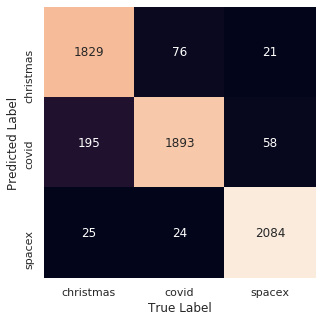

In [10]:
distinct_label = sorted(set(distinct_label)) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], labels)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = distinct_label, yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

In [11]:
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "macro"), 6))

Micro-average F1 scores: 0.935697
Macro-average F1 scores: 0.935057


## 3. Compute similarities between tweets using Fast Text word embedding

In [53]:
#pip install gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import FastText